Data Preprocessing





In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import csv
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier


In [5]:
test_data = pd.read_csv("/content/testms.csv")
train_data = pd.read_csv("/content/trainms.csv")

In [6]:
# Drop unnecessary columns (if needed)
train_data = train_data.drop(columns=['s.no', 'Timestamp', 'comments'])
test_data = test_data.drop(columns=['s.no', 'Timestamp', 'comments'])
# Encode categorical features
le = LabelEncoder()
categorical_columns = ['Gender', 'Country', 'state', 'self_employed', 'family_history',
                        'work_interfere', 'no_employees', 'remote_work', 'tech_company',
                        'benefits', 'care_options', 'wellness_program', 'seek_help',
                        'anonymity', 'leave', 'mental_health_consequence',
                        'phys_health_consequence', 'coworkers', 'supervisor',
                        'mental_health_interview', 'phys_health_interview',
                        'mental_vs_physical', 'obs_consequence']
for column in categorical_columns:
    if column in train_data.columns:
        train_data[column] = le.fit_transform(train_data[column])
    if column in test_data.columns:
        test_data[column] = le.fit_transform(test_data[column])

# Split the data into features and target variable
X = train_data.drop('treatment', axis=1)
y = train_data['treatment']

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Feature Selection using Logistic Regression
selector = SelectFromModel(LogisticRegression())
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Fit logistic regression on the selected features
logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)

# Predict on the validation set
y_pred = logreg.predict(X_val_selected)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

          No       0.73      0.69      0.71       104
         Yes       0.69      0.73      0.71        96

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


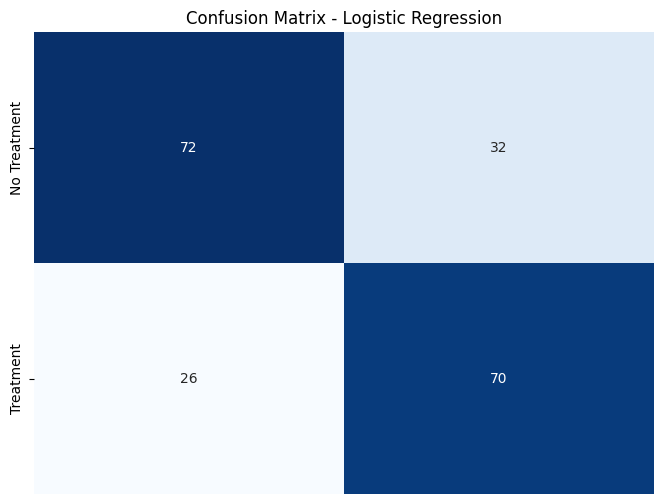

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have predictions from logistic regression (logreg.predict) stored in y_pred
logistic_cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(logistic_cm, annot=True, fmt='d', cmap='Blues', xticklabels=False,
            yticklabels=['No Treatment', 'Treatment'], cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


Random Forest Accuracy: 0.82
Classification Report (Random Forest):
               precision    recall  f1-score   support

          No       0.87      0.77      0.82       104
         Yes       0.78      0.88      0.82        96

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



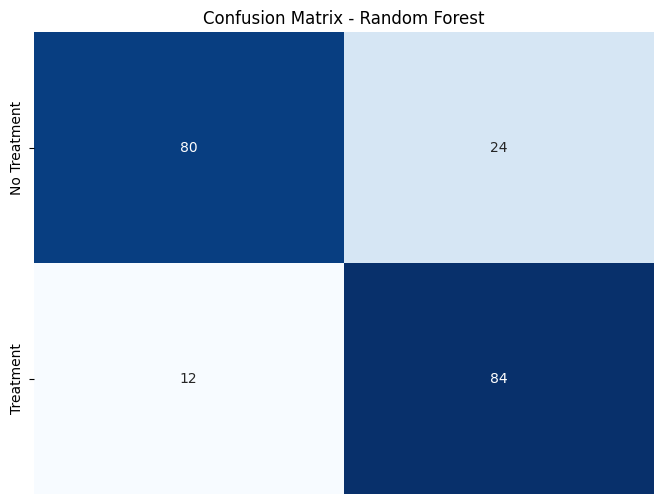

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Handling Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Hyperparameter Tuning using GridSearchCV with RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Best hyperparameters
best_params = grid_search.best_params_

# Train RandomForest with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_pred_rf = best_rf_model.predict(X_val_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report (Random Forest):\n", classification_report(y_val, y_pred_rf))

# Confusion Matrix
rf_cm = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=False,
            yticklabels=['No Treatment', 'Treatment'], cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [11]:
# Example: Polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_resampled)
X_val_poly = poly.transform(X_val_scaled)

# Train RandomForest on the polynomial features
rf_model_poly = RandomForestClassifier(**best_params, random_state=42)
rf_model_poly.fit(X_train_poly, y_train_resampled)

# Predict on the validation set
y_pred_rf_poly = rf_model_poly.predict(X_val_poly)

# Evaluate the model with polynomial features
accuracy_rf_poly = accuracy_score(y_val, y_pred_rf_poly)
print(f"Random Forest Accuracy with Polynomial Features: {accuracy_rf_poly:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report (Random Forest with Polynomial Features):\n", classification_report(y_val, y_pred_rf_poly))


Random Forest Accuracy with Polynomial Features: 0.82
Classification Report (Random Forest with Polynomial Features):
               precision    recall  f1-score   support

          No       0.90      0.75      0.82       104
         Yes       0.77      0.91      0.83        96

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.84      0.82      0.82       200



In [13]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', best_rf_model),
    # Add more models as needed
], voting='hard')

voting_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_voting = voting_classifier.predict(X_val_scaled)

# Evaluate the ensemble model
accuracy_voting = accuracy_score(y_val, y_pred_voting)
print(f"Ensemble (Voting Classifier) Accuracy: {accuracy_voting:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report (Voting Classifier):\n", classification_report(y_val, y_pred_voting))


Ensemble (Voting Classifier) Accuracy: 0.79
Classification Report (Voting Classifier):
               precision    recall  f1-score   support

          No       0.77      0.85      0.81       104
         Yes       0.81      0.73      0.77        96

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



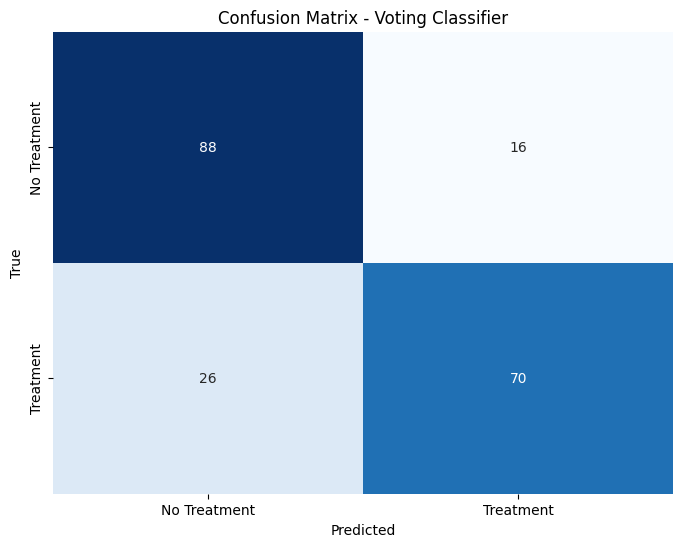

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Voting Classifier
voting_cm = confusion_matrix(y_val, y_pred_voting)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'],
            yticklabels=['No Treatment', 'Treatment'], cbar=False)
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Ensemble (Voting Classifier) Accuracy: 0.79
Classification Report (Voting Classifier):
               precision    recall  f1-score   support

          No       0.77      0.85      0.81       104
         Yes       0.81      0.73      0.77        96

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



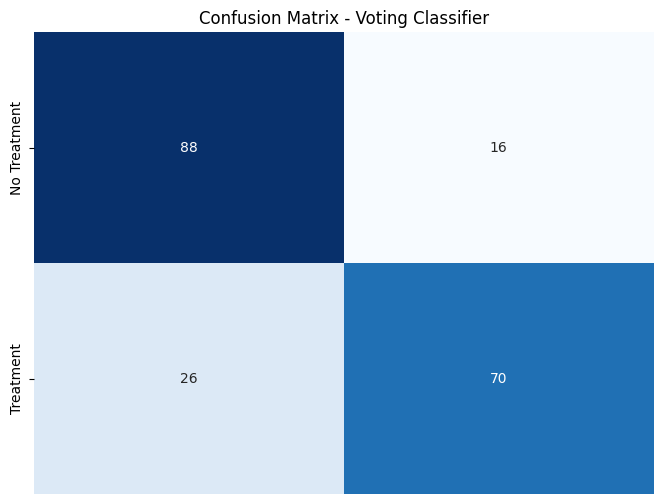

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have X_train_resampled, y_train_resampled, X_val_scaled

# Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Random Forest model
rf_model = RandomForestClassifier(**best_params, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Ensemble (Voting Classifier)
voting_classifier = VotingClassifier(estimators=[
    ('logreg', logreg_model),
    ('rf', rf_model)
], voting='hard')

voting_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_voting = voting_classifier.predict(X_val_scaled)

# Evaluate the ensemble model
accuracy_voting = accuracy_score(y_val, y_pred_voting)
print(f"Ensemble (Voting Classifier) Accuracy: {accuracy_voting:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report (Voting Classifier):\n", classification_report(y_val, y_pred_voting))

# Confusion Matrix
voting_cm = confusion_matrix(y_val, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='Blues', xticklabels=False,
            yticklabels=['No Treatment', 'Treatment'], cbar=False)
plt.title('Confusion Matrix - Voting Classifier')
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report

# Fit a full logistic regression model using statsmodels
logreg_model = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# Display summary to see p-values and identify significant features
print(logreg_model.summary())

# Identify significant features based on a chosen significance level (e.g., 0.05)
significant_features = logreg_model.pvalues[logreg_model.pvalues < 0.05].index

# Select only significant features in the training and validation sets
X_train_significant = X_train[significant_features]
X_val_significant = X_val[significant_features]

# Fit logistic regression on the selected significant features
logreg_full_model = LogisticRegression()
logreg_full_model.fit(X_train_significant, y_train)

# Predict on the validation set
y_pred_full_model = logreg_full_model.predict(X_val_significant)

# Evaluate the model
accuracy_full_model = accuracy_score(y_val, y_pred_full_model)
print(f"Accuracy with Full Model Features: {accuracy_full_model:.2f}")

# Print classification report for more detailed evaluation
print("Classification Report (Full Model Features):\n", classification_report(y_val, y_pred_full_model))


ValueError: ignored